# Enoncé: 
    
Nous allons implémenter une architecture auto encoder et découvrir ensemble l'un des cas d'applications. Nous allons à l'aide d'un autoencoder débruité des images.
L'objectif est d'entrainer un autoencoder à reproduire l'entrée qu'il a.
Comme nous diminuons l'information au centre de l'autoencoder, seul les informations les plus pertinentes sont conservées.
Celles-ci sont séléctionnées automatiquement par apprentissage. En effet, en essayant d'optimiser notre fonction de coût, l'autoencoder va, pour mimnimiser son erreur, conserver uniquement l'information qui a le plus d'impact sur la sortie.

Une fois que notre autoencoder est entraîné, on peut le réutiliser en lui donnant en entrée une image bruitée. L'autoencoder va ainsi nous retourner une image sans bruit.

Pour ce tp nous utiliserons les images du challenge mnist 

# 1.Import

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import random

In [2]:
import keras

from keras.models import Model
from keras.datasets import mnist
from keras.layers import Convolution2D, MaxPooling2D
from keras.layers import Input, UpSampling2D

from keras.models import Sequential
print(keras.__version__)

Using TensorFlow backend.


2.3.1


# 2. Load dataset

In [3]:
(x_train, _), (x_test, _) = mnist.load_data()

In [4]:
def print_images(dataset, is_reshape=False):
    for i in range (10):
        item = random.randrange(0, dataset.shape[0], dataset.shape[0]/10)
        if is_reshape:
            img = dataset[item].reshape(28,28)
        else:
            img = dataset[item]
        plt.imshow(img, interpolation='nearest')
        plt.show()

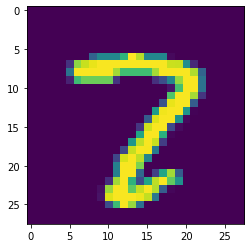

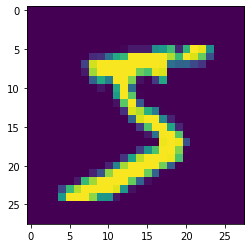

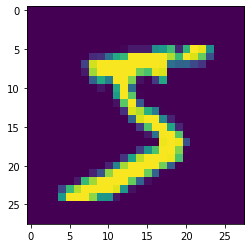

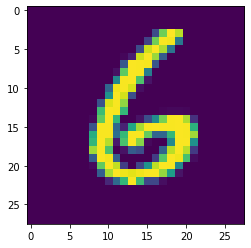

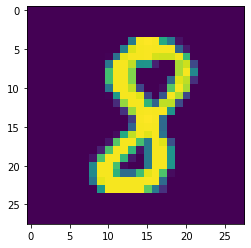

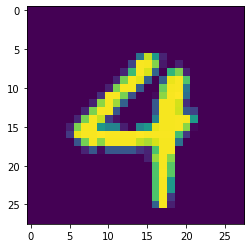

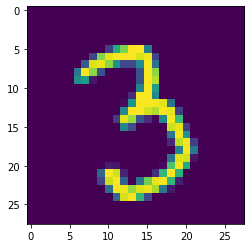

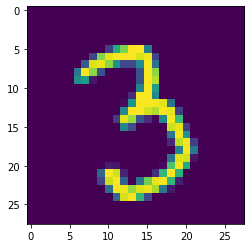

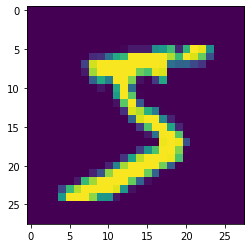

In [5]:
print_images(x_train)

## 2.1 Normalise data

In [6]:
# normalize train data
x_train = x_train.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
print(x_train.shape)

(60000, 28, 28, 1)


In [7]:
# normalize test data (which serves as our labels)
x_test = x_test.astype('float32') / 255.
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))
print(x_test.shape)

(10000, 28, 28, 1)


## 2.2 Add noise

In [8]:
# create noisy data for train and test
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

In [9]:
# renormalize through clipping
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

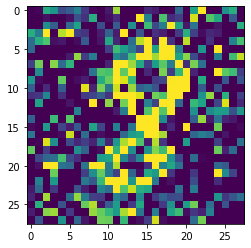

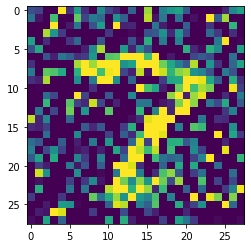

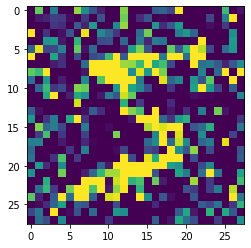

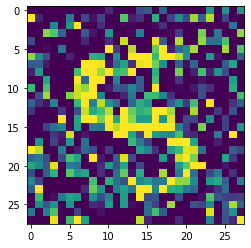

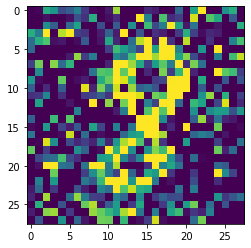

In [10]:
print_images(x_train_noisy, is_reshape=True)

# 3. Modeling

Pour modéliser plus facilement notre architecture nous allons nous baser sur une autre API de KERAS. Voic doc : https://keras.io/getting-started/functional-api-guide/

## 3.1 Encoder

In [11]:

input_img = Input(shape=(28,28,1))
x = Convolution2D(32,3,3,activation='relu',border_mode='same')(input_img)
x = MaxPooling2D((2,2),border_mode='same')(x)
x = Convolution2D(32,3,3,activation='relu',border_mode='same')(x)
encoded = MaxPooling2D((2,2),border_mode='same')(x)


Instructions for updating:
If using Keras pass *_constraint arguments to layers.



c:\users\pierre.leroy\appdata\local\continuum\miniconda3\envs\majeure_dl\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", padding="same")`
  
c:\users\pierre.leroy\appdata\local\continuum\miniconda3\envs\majeure_dl\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `MaxPooling2D` call to the Keras 2 API: `MaxPooling2D((2, 2), padding="same")`
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\pierre.leroy\appdata\local\continuum\miniconda3\envs\majeure_dl\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", padding="same")`
  after removing the cwd from sys.path.
c:\users\pierre.leroy\appdata\local\continuum\miniconda3\envs\majeure_dl\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `MaxPooling2D` call to the Keras 2 API: `MaxPooling2

## 3.2 Decoder

In [12]:
x = Convolution2D(32,3,3,activation='relu',border_mode='same')(encoded)
x = UpSampling2D((2,2))(x)
x = Convolution2D(32,3,3,activation='relu',border_mode='same')(x)
x = UpSampling2D((2,2))(x)
decoded = Convolution2D(1,3,3,activation='sigmoid',border_mode='same')(x)
#back to 28,28,1

c:\users\pierre.leroy\appdata\local\continuum\miniconda3\envs\majeure_dl\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", padding="same")`
  """Entry point for launching an IPython kernel.
c:\users\pierre.leroy\appdata\local\continuum\miniconda3\envs\majeure_dl\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", padding="same")`
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\pierre.leroy\appdata\local\continuum\miniconda3\envs\majeure_dl\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(1, (3, 3), activation="sigmoid", padding="same")`
  """


## 3.3 Merge 

In [13]:
# create the autoencoder by merging the encode and decode networks together
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam',loss='binary_crossentropy')
autoencoder.summary()

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 32)          9248      
_______________________________

# 4.0 Train

In [14]:
# train
autoencoder.fit(x_train_noisy, x_train,
  nb_epoch=2,
  batch_size=256,
  shuffle=True,
  validation_data=(x_test_noisy, x_test))

c:\users\pierre.leroy\appdata\local\continuum\miniconda3\envs\majeure_dl\lib\site-packages\ipykernel_launcher.py:6: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  



Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 133s 2ms/step - loss: 0.2156 - val_loss: 0.1339
Epoch 2/2
60000/60000 [==============================] - 152s 3ms/step - loss: 0.1251 - val_loss: 0.1178


# 5.0 Use the model for denoying

In [15]:
decoded_imgs = autoencoder.predict(x_test_noisy)

# 6.0 Print the results

In [16]:
# display the images
n = 10
plt.figure(figsize=(30,6))
for i in range(n):
  # noisy images
  ax = plt.subplot(3,n,i+1)
  plt.imshow(x_test_noisy[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)    
  ax.set_title('noisy images')

  # denoised images
  ax = plt.subplot(3,n,i+1+n)
  plt.imshow(decoded_imgs[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
  ax.set_title('denoised images')

  # original images
  ax = plt.subplot(3,n,i+1+n*2)
  plt.imshow(x_test[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
  ax.set_title('original images')

plt.show()